# Why this data?

Data Set from year 2013 - 2018

To be frank, I've no interest in pets. But, I question those who are. That is why I decided to explore this shelter dataset. I'll be looking for factors that make people abandon their pets and factors that make people adopt these pets. Again, I have little to no experience or understanding in the fields still, there should be some findings that I may conclude.

## Prep

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns

fig_size = (12, 8)

In [30]:
df_in_out = pd.read_csv("../input/aac_intakes_outcomes.csv")
df_in = pd.read_csv("../input/aac_intakes.csv")
df_out = pd.read_csv("../input/aac_outcomes.csv")

In [31]:
print(df_in_out.shape)
print(df_in.shape)
print(df_out.shape)
df = df_in_out

(79672, 41)
(80187, 12)
(80681, 12)


So by using the merege data set lose 80681 - 79672 = 1009 rows of data <br>
1009 is ~1.25% of 80681 which is rather small so I'm okay with losing those <br>
Hence I'll only use df_in_out [Merged data]

Now to see how many values are missing?

In [32]:
df.isnull().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

Notice that more than half of the record <br>
is missing 'outcome_subtype' <br>
thus I decided to drop the column

In [33]:
df = df.drop(['outcome_subtype'], axis = 1)

Looking at the columns <br>
breed is related to animal_type <br>
So, I think I'll seperate the data by animal types

In [34]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

Let's look at the number of animal types

In [35]:
df.groupby('animal_type')['animal_id_outcome'].count()

animal_type
Bird       339
Cat      29539
Dog      45366
Other     4428
Name: animal_id_outcome, dtype: int64

I've expect Dogs and Cats to be greater in numbers <br>
But not to this extent <br>
So, change of plans <br>
I think I will split the data into 3 groups:  dogs, cats and others <br>
<br>
For Dogs and Cats I will look at when and why were they left at the shelter <br>
For others (including birds), I will explore and decide further

In [36]:
dogs   = df[df.animal_type=='Dog']
cats   = df[df.animal_type=='Cat']
others = df[(df['animal_type'] != 'Dog') & (df['animal_type'] != 'Cat')]
print("dogs: "   + str(dogs['animal_id_outcome'].count()))
print("cats: "   + str(cats['animal_id_outcome'].count()))
print("others: " + str(others['animal_id_outcome'].count()))

dogs: 45366
cats: 29539
others: 4767


# Dogs

We know from earlier that there are way more records of dogs <br>
coming in and going out of the shelter more than any other animals <br>

First and foremost let's explore dogs data

## Gender of dogs changes?

Well, in my country Thailand. Stray dogs caused so much problems <br>
captured dogs will be sterilized so I figure would it be the same in the U.S.? <br>

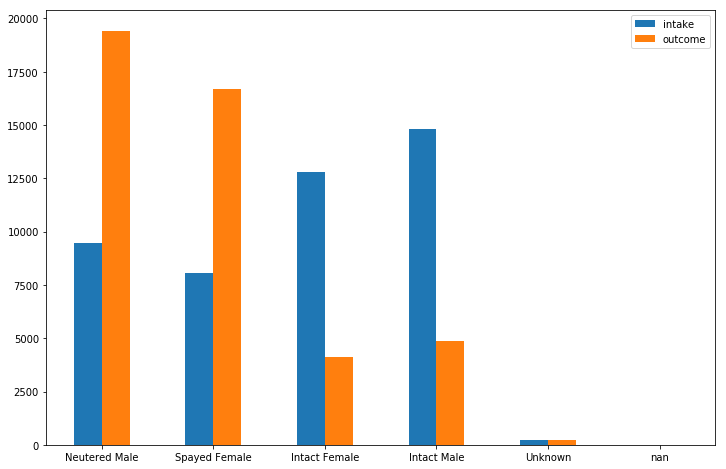

In [37]:
x = pd.DataFrame({'intake': dogs['sex_upon_intake'].value_counts(), 'outcome': dogs['sex_upon_outcome'].value_counts()}, index = dogs['sex_upon_intake'].unique())
ax = x.plot.bar(rot=0, figsize = fig_size)

From the graph, my assumption holds true <br>
Most of the dogs that came in the shelter got sterilized <br>

## Breeds discrimination?

Of to the next discovery, I am thinking of breed <br>
Are the chance of sheltering dogs and release them affected by their breeds? <br>
If so, can we identify the popular and unpopular breeds?

First I want to observe the unpopular ones <br>
Specifically stray dogs <br>

Noted that this 'Stray' in this case can be interpret 2 ways <br>
Either it is that those dogs are abandoned by their previous owner <br>
Or that it is the breed of dogs that populate well and later taken in by government or shelter officers

In [38]:
dogs['intake_type'].value_counts()

Stray                 32157
Owner Surrender        8924
Public Assist          4103
Euthanasia Request      182
Name: intake_type, dtype: int64

As I mentioned earlier, I am only interested in 'Stray' dogs <br>
So let's look at their breed <br>

In [39]:
stray_dogs = dogs[dogs['intake_type'] == 'Stray']

# Top 20
stray_dogs['breed'].value_counts().head(20)

Pit Bull Mix                 4221
Labrador Retriever Mix       3588
Chihuahua Shorthair Mix      3449
German Shepherd Mix          1386
Australian Cattle Dog Mix     780
Dachshund Mix                 589
Miniature Poodle Mix          521
Boxer Mix                     476
Border Collie Mix             435
Rat Terrier Mix               355
Siberian Husky Mix            350
Catahoula Mix                 331
Yorkshire Terrier Mix         327
Australian Shepherd Mix       327
Jack Russell Terrier Mix      319
Miniature Schnauzer Mix       311
Beagle Mix                    295
Great Pyrenees Mix            290
Cairn Terrier Mix             274
Staffordshire Mix             269
Name: breed, dtype: int64

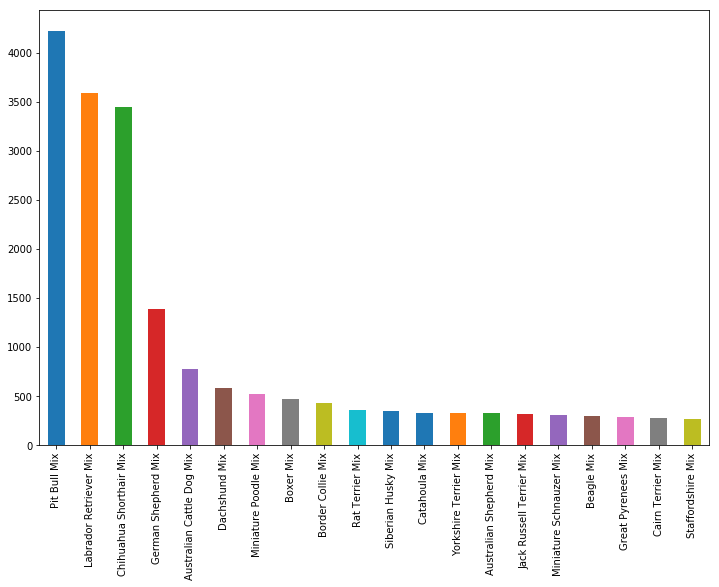

In [40]:
stray_dogs['breed'].value_counts().head(20).plot.bar(figsize = fig_size)

The result for breed stray dogs coming in is quite surprising <br>
The graph showed 'Pit Bull' coming in first then follow by 'Labrador' and 'Chihuahua' <br>

Now let's proceed to outcome

In [41]:
dogs['outcome_type'].value_counts()

Adoption           20581
Return to Owner    13273
Transfer            9697
Euthanasia          1502
Rto-Adopt            143
Died                 142
Missing               16
Disposal              10
Name: outcome_type, dtype: int64

For outcome, I want to see data of dogs being adopted <br>
That should also include 'Return to Owner' <br>

But to merge them just like that is wrong <br>
So I must examine them separately first then decide <br>

In [42]:
a_dogs = dogs[dogs.outcome_type == 'Adoption']
r_dogs = dogs[dogs.outcome_type == 'Return to Owner']
a_r_dogs = dogs[(dogs.outcome_type == 'Adoption') | (dogs.outcome_type == 'Return to Owner')]

# Top 20
a_dogs['breed'].value_counts().head(20)

Labrador Retriever Mix       2368
Pit Bull Mix                 2324
Chihuahua Shorthair Mix      2270
German Shepherd Mix           922
Australian Cattle Dog Mix     607
Dachshund Mix                 390
Border Collie Mix             352
Boxer Mix                     306
Miniature Poodle Mix          275
Catahoula Mix                 250
Australian Shepherd Mix       219
Jack Russell Terrier Mix      215
Cairn Terrier Mix             209
Staffordshire Mix             206
Rat Terrier Mix               205
Pointer Mix                   197
Chihuahua Longhair Mix        188
Siberian Husky Mix            187
Yorkshire Terrier Mix         182
Beagle Mix                    173
Name: breed, dtype: int64

In [67]:
r_dogs['breed'].value_counts().head(20)

Pit Bull Mix                 2199
Labrador Retriever Mix       1247
Chihuahua Shorthair Mix      1169
German Shepherd Mix           587
Australian Cattle Dog Mix     251
Miniature Poodle Mix          240
Boxer Mix                     210
Dachshund Mix                 202
Siberian Husky Mix            194
Border Collie Mix             175
Yorkshire Terrier Mix         145
Australian Shepherd Mix       140
Rat Terrier Mix               136
Miniature Schnauzer Mix       135
Rottweiler Mix                128
Catahoula Mix                 126
Jack Russell Terrier Mix      113
Staffordshire Mix             112
Beagle Mix                    112
Pit Bull                      107
Name: breed, dtype: int64

In [44]:
a_r_dogs['breed'].value_counts().head(20)

Pit Bull Mix                 4523
Labrador Retriever Mix       3615
Chihuahua Shorthair Mix      3439
German Shepherd Mix          1509
Australian Cattle Dog Mix     858
Dachshund Mix                 592
Border Collie Mix             527
Boxer Mix                     516
Miniature Poodle Mix          515
Siberian Husky Mix            381
Catahoula Mix                 376
Australian Shepherd Mix       359
Rat Terrier Mix               341
Jack Russell Terrier Mix      328
Yorkshire Terrier Mix         327
Staffordshire Mix             318
Miniature Schnauzer Mix       307
Beagle Mix                    285
Chihuahua Longhair Mix        276
Cairn Terrier Mix             272
Name: breed, dtype: int64

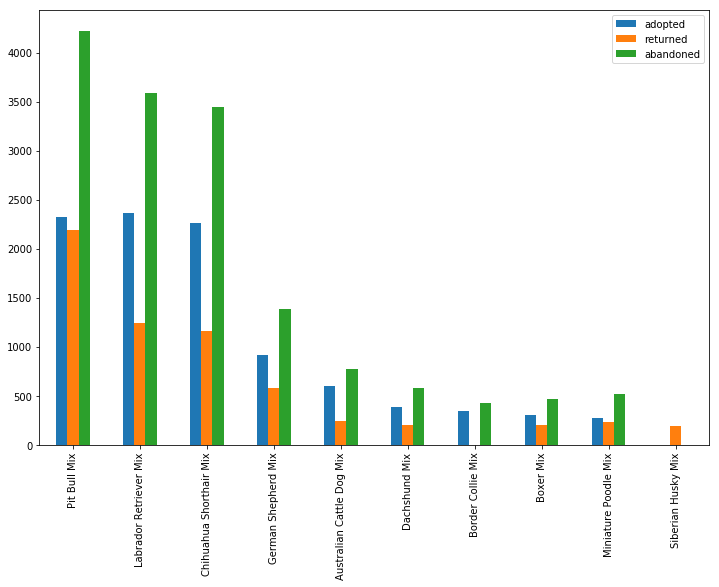

In [45]:
x = pd.DataFrame({'adopted': a_dogs['breed'].value_counts().head(9), 'returned': r_dogs['breed'].value_counts().head(9), 'abandoned': stray_dogs['breed'].value_counts().head(9)}, index = a_r_dogs['breed'].value_counts().head(10).index.values)
ax = x.plot.bar(rot=90, figsize = fig_size)

From the graph, it is expected to see discrimination of 'Pit Bull' <br>
'Pib Bull' came in first as 'abandoned' or 'stray' pets <br>
But fall short to 'Labrador' as per number of adoption <br>

On the other hand, 'Pit Bull' has the highest return to owner / abandon ratio <br>
Facts:
* Pit bull was taken in most (as stray)
* There are fewer People who adopted Pit Bulls
* Pit bulls are most likely breed to be returned to their owner

My conclusion:

I would not call it discrimination, but rather unique<br>
'Pit Bull' owner are niche compare to other breed of dogs <br>
But this niche group is quite loyal to their dogs <br>
As their returned rate is rather high compare to the rest

## When in? and When out?

Lastly for dogs, are they any pattern in number of intakes and outcomes when looking at dates? <br>
Fist I'll aggregate them by year

In [46]:
dogs_year_in  = dogs.groupby(['intake_year'])
dogs_year_out = dogs.groupby(['outcome_year'])

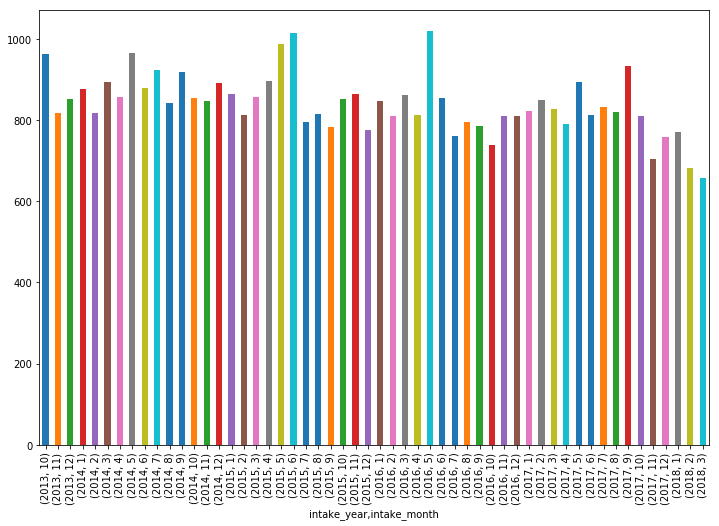

In [47]:
# ref 1
# https://www.theguardian.com/us-news/2015/may/27/chimpanzee-animals-rights-new-york-court
# ref 2
# https://www.avma.org/Events/pethealth/Pages/default.aspx#May

dogs_year_in['intake_month'].value_counts().sort_index().plot.bar(figsize = fig_size)

We can observe some spikes in shelter intakes around April to May of 2015 and 2016 <br>
In addtion, intakes on average is higher during spring (highest, March - May [U.S.]) and summer (June - August [U.S.]) <br>

This information is too little to conclude.

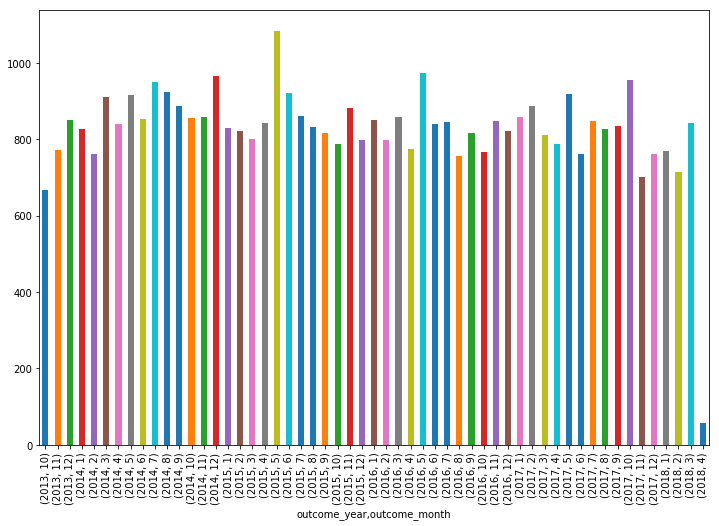

In [48]:
dogs_year_out['outcome_month'].value_counts().sort_index().plot.bar(figsize = fig_size)

Some thing has to happend in the U.S. during May of 2015 <br>
having high spikes in both intakes and outcomes <br>

Let's see 2015's data

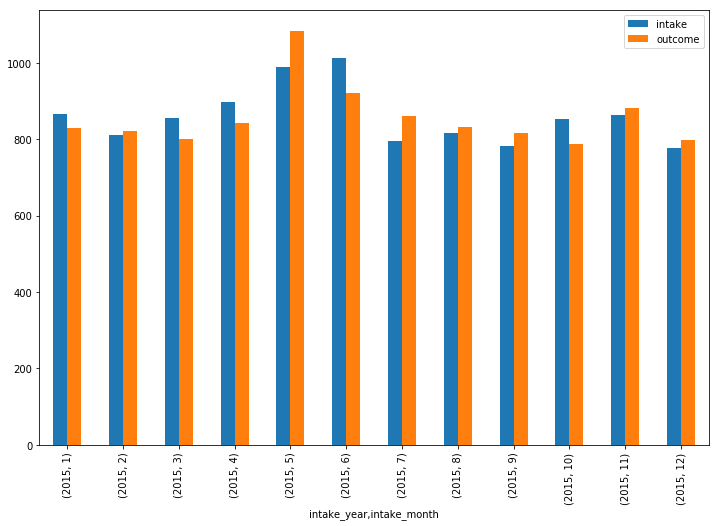

In [49]:
dogs_in_2015  = dogs[dogs.intake_year == 2015].groupby(['intake_year'])['intake_month'].value_counts().sort_index()
dogs_out_2015  = dogs[dogs.outcome_year == 2015].groupby(['outcome_year'])['outcome_month'].value_counts().sort_index()

# dogs_2015_g_in  = dogs_in_2015.plot.bar(figsize = fig_size)
# dogs_2015_g_out  = dogs_out_2015.plot.bar(figsize = fig_size)

x = pd.DataFrame({'intake': dogs_in_2015, 'outcome': dogs_out_2015})
ax = x.plot.bar(rot=90, figsize = fig_size)

So in May and June of 2015, a spike exist for outcomes <br>
for intakes, instead of spikes, I can observe a steady rise since February <br>

Could this disaster be the result? <br>
https://en.wikipedia.org/wiki/2015_Texas%E2%80%93Oklahoma_flood_and_tornado_outbreak
https://en.wikipedia.org/wiki/Yarnell_Hill_Fire

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


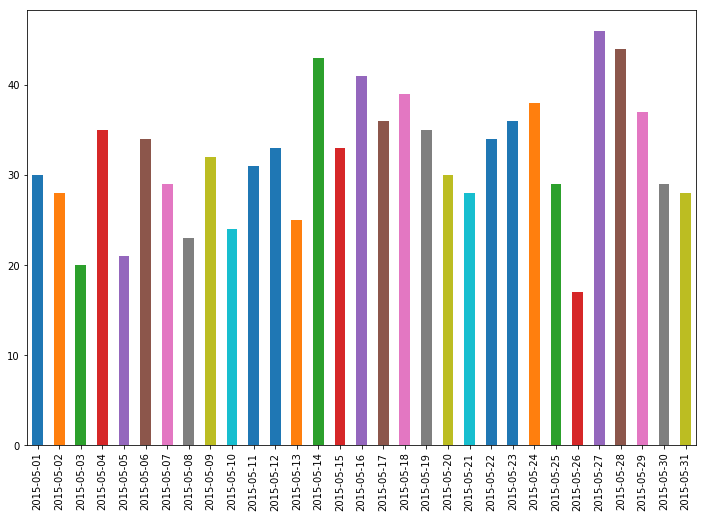

In [50]:
dogs["intake_date"]  = pd.to_datetime(dogs["intake_datetime"]).dt.date
dogs["outcome_date"] = pd.to_datetime(dogs["outcome_datetime"]).dt.date
dogs[(dogs.intake_year == 2015) & (dogs.intake_month == 5)]['intake_date'].value_counts().sort_index().plot.bar(figsize = fig_size)

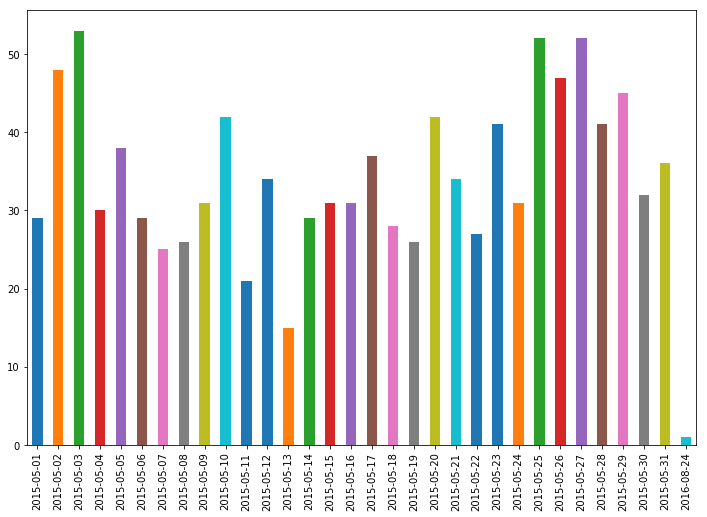

In [51]:
dogs[(dogs.outcome_year == 2015) & (dogs.outcome_month == 5)]['outcome_date'].value_counts().sort_index().plot.bar(figsize = fig_size)

For, intakes there's a steady increasing trend from the the beginning of the month until the very end <br>
This indicates that something happened and animals were found and taken it <br>

As for outcome, the number piled at the beginning of the month and the end <br>
If the disaster is the cause, then this number indicates 2 disasters <br>
one at the end of last month and another one around middle of this month <br>

Which is not the case, it's likely something else

# Cats

The number of records of cats come in second, <br>
Let's answer the same question I did so with dogs <br>

Does cat get sterilized? or it is just against dogs?

## Gender of cats changes?

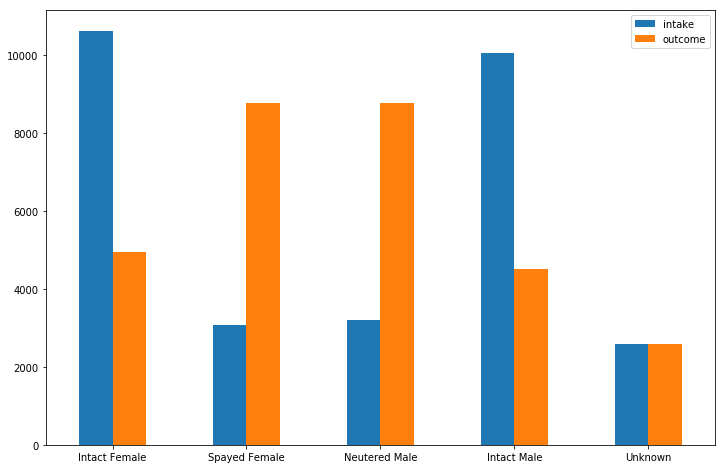

In [52]:
x = pd.DataFrame({'intake': cats['sex_upon_intake'].value_counts(), 'outcome': cats['sex_upon_outcome'].value_counts()}, index = cats['sex_upon_intake'].unique())
ax = x.plot.bar(rot=0, figsize = fig_size)

The ratio of cats being sterilized is similiar or equal to dogs <br>
No surprise value here, cats are being treated the same way.

# Breed discrimination?

I know there is quite a number of cat people out there <br>
But, is there a pattern of mutual preferrence among them? <br>

Does any breed of cats is more popular or unpopular?

First, always the unpopylar ones <br>
I'm looking at 'Stray' cats <br>

Noted that there actually people who request for Euthanasia for their cats <br>
I thought most people will just leave their cats when they are old at home <br>

In [57]:
cats['intake_type'].value_counts()

Stray                 23042
Owner Surrender        5767
Public Assist           672
Euthanasia Request       58
Name: intake_type, dtype: int64

In [59]:
stray_cats = cats[cats['intake_type'] == 'Stray']

# Top 20
stray_cats['breed'].value_counts().head(20)

Domestic Shorthair Mix         18494
Domestic Medium Hair Mix        1832
Domestic Longhair Mix            920
Siamese Mix                      757
Domestic Shorthair               261
American Shorthair Mix           176
Snowshoe Mix                     102
Domestic Medium Hair              97
Manx Mix                          52
Maine Coon Mix                    50
Siamese                           47
Russian Blue Mix                  41
Domestic Longhair                 22
Himalayan Mix                     19
Ragdoll Mix                       15
Persian Mix                       12
Angora Mix                         8
Balinese Mix                       8
Bengal Mix                         7
American Curl Shorthair Mix        7
Name: breed, dtype: int64

ref for ['Domestic shorthair'](https://www.google.com/search?rlz=1C1CHBF_enTH842TH842&tbm=isch&q=domestic+shorthair&spell=1&sa=X&ved=0ahUKEwjU1IbPuvThAhUaT48KHch-D0kQBQhmKAA&biw=1920&bih=975&dpr=1)

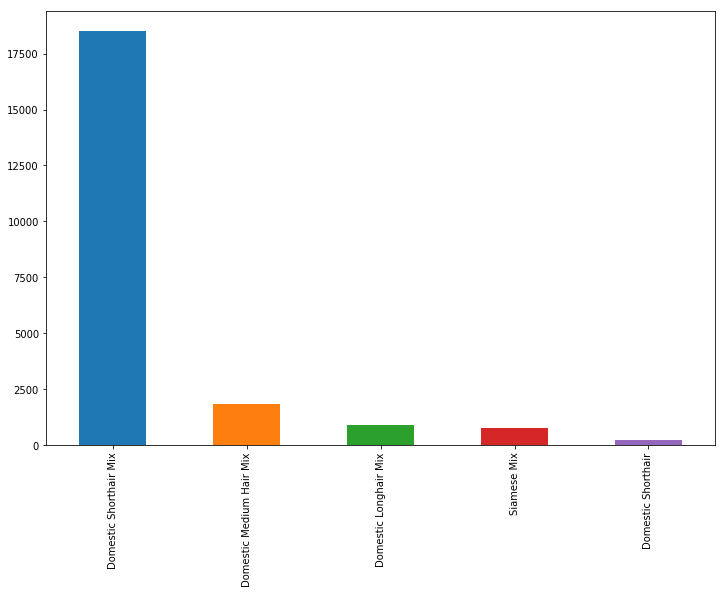

In [61]:
stray_cats['breed'].value_counts().head(5).plot.bar(figsize = fig_size)

Wow, that was quite a number <br>
Reality check()! <br>
It could means either that <br>
1. Short hairs are the less fortunate breed or
2. Most of the cats in the U.S. is short hair as the number of intakes increases

We have to look at the ratio <br>
(Only if I managed to find it of course)

Let's proceed to the out come

In [63]:
dogs['outcome_type'].value_counts()

Adoption           20581
Return to Owner    13273
Transfer            9697
Euthanasia          1502
Rto-Adopt            143
Died                 142
Missing               16
Disposal              10
Name: outcome_type, dtype: int64

Same as what I did with dogs, for the very same reason <br>
I need to consider 'Adoption' along with 'Return to owner <br>

In [66]:
a_cats = cats[cats.outcome_type == 'Adoption']
r_cats = cats[cats.outcome_type == 'Return to Owner']
a_r_cats = cats[(cats.outcome_type == 'Adoption') | (cats.outcome_type == 'Return to Owner')]

# Top 20
a_cats['breed'].value_counts().head(5)

Domestic Shorthair Mix      9865
Domestic Medium Hair Mix    1037
Domestic Longhair Mix        578
Siamese Mix                  455
Domestic Shorthair           179
Name: breed, dtype: int64

In [68]:
r_cats['breed'].value_counts().head(5)

Domestic Shorthair Mix      1051
Domestic Longhair Mix        104
Domestic Medium Hair Mix     104
Siamese Mix                   69
Domestic Shorthair            34
Name: breed, dtype: int64

In [70]:
a_r_cats['breed'].value_counts().head(5)

Domestic Shorthair Mix      10916
Domestic Medium Hair Mix     1141
Domestic Longhair Mix         682
Siamese Mix                   524
Domestic Shorthair            213
Name: breed, dtype: int64

Well, again no surprise value <br>
There is a siginificant diffrence between **shorthair** and **mediumhair** <br>

I think it is safe to say that there is just more cats with **shorthair** <br>
It does not have anything to do with preferrence at all <br>
Since, there is more **shorthair** coming in and out of the shelter

Off to the last question

# When in? and When out?

We know for sure from examining dogs data that some event occured aroung April - June of 2015 <br>
Does cat intakes and outcomes data corresponds to those of dogs? <br>
If not can we conclude that those data are just pure chances?

In [73]:
cats_year_in  = cats.groupby(['intake_year'])
cats_year_out = cats.groupby(['outcome_year'])

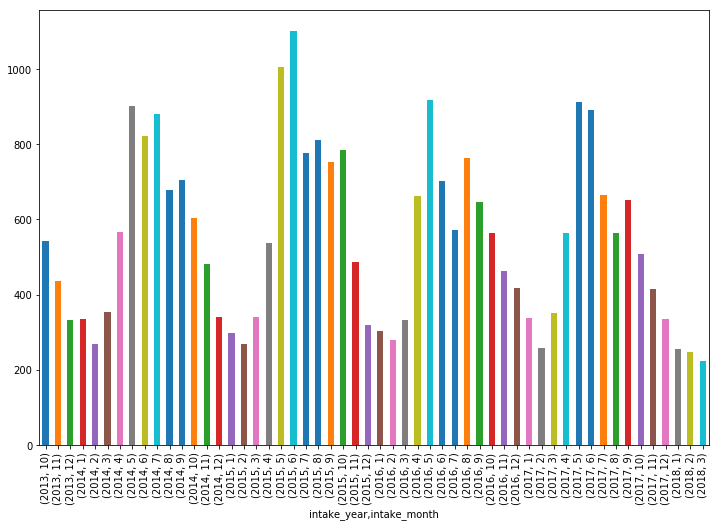

In [74]:
cats_year_in['intake_month'].value_counts().sort_index().plot.bar(figsize = fig_size)

For intakes earlier assumption holds true <br>
Some thing is going on during May of 2015 <br>

Unlike dogs which have constant intakes then spikes as of May 2015, <br>
cat intakes pile up heavilty at second half of each year <br>

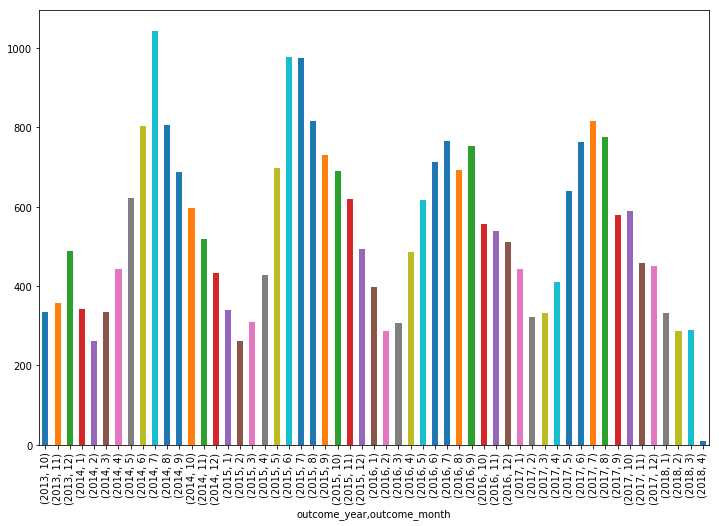

In [75]:
cats_year_out['outcome_month'].value_counts().sort_index().plot.bar(figsize = fig_size)